In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Source originates from:
https://www.nber.org/system/files/working_papers/w23429/w23429.pdf

In [78]:
data = yf.download('^HSI', start='2010-01-01', interval='1mo').dropna()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

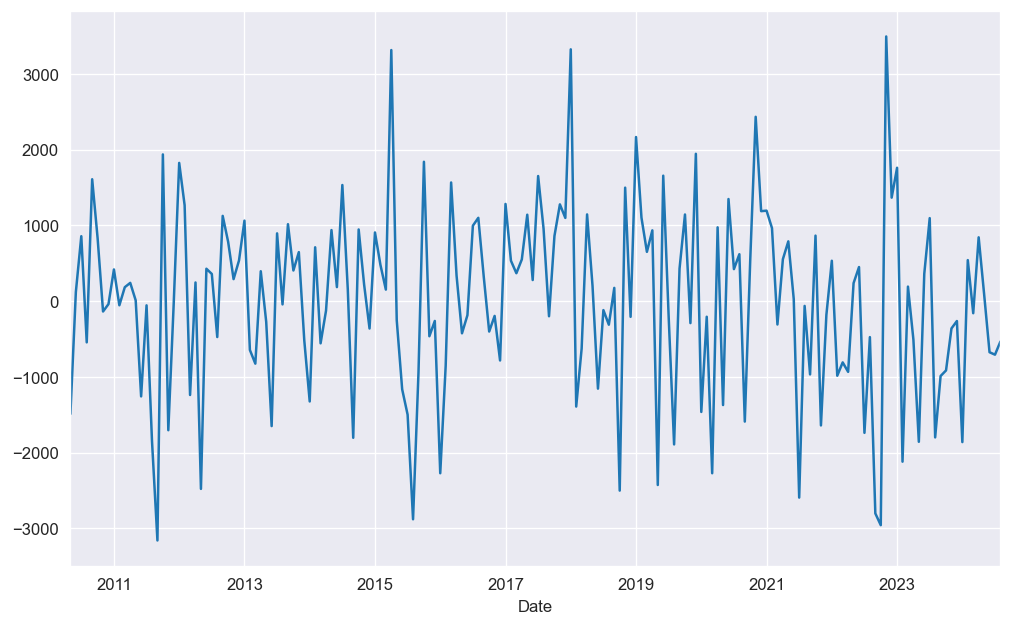

In [79]:
# Define the horizon (h)
h = 4  # You can change this to the desired horizon

# Create lagged variables
data['lag1'] = data['Close'].shift(1)
data['lag2'] = data['Close'].shift(2)
data['lag3'] = data['Close'].shift(3)
data['lag4'] = data['Close'].shift(4)

# Drop rows with NaN values
data = data.dropna()

# Define the dependent and independent variables
X = data[['lag1', 'lag2', 'lag3', 'lag4']]
y = data['Close']

# Add a constant to the independent variables
X = sm.add_constant(X)

# split to train test
x_train = X[:int(X.shape[0]*8)]
y_train = y[:int(X.shape[0]*8)]
x_test = X[int(X.shape[0]*8):]
y_test = y[int(X.shape[0]*8):]

# Fit the regression model
model = sm.OLS(y_train, x_train).fit()

# Make predictions
data['forecast'] = model.predict(sm.add_constant(data[['lag1', 'lag2', 'lag3', 'lag4']]))

# Calculate the forecast error
data['forecast_error'] = data['Close'] - data['forecast']

# The forecast error is the cyclical component
cyclical_component = data['forecast_error']

cyclical_component.plot()

<Axes: xlabel='Date'>

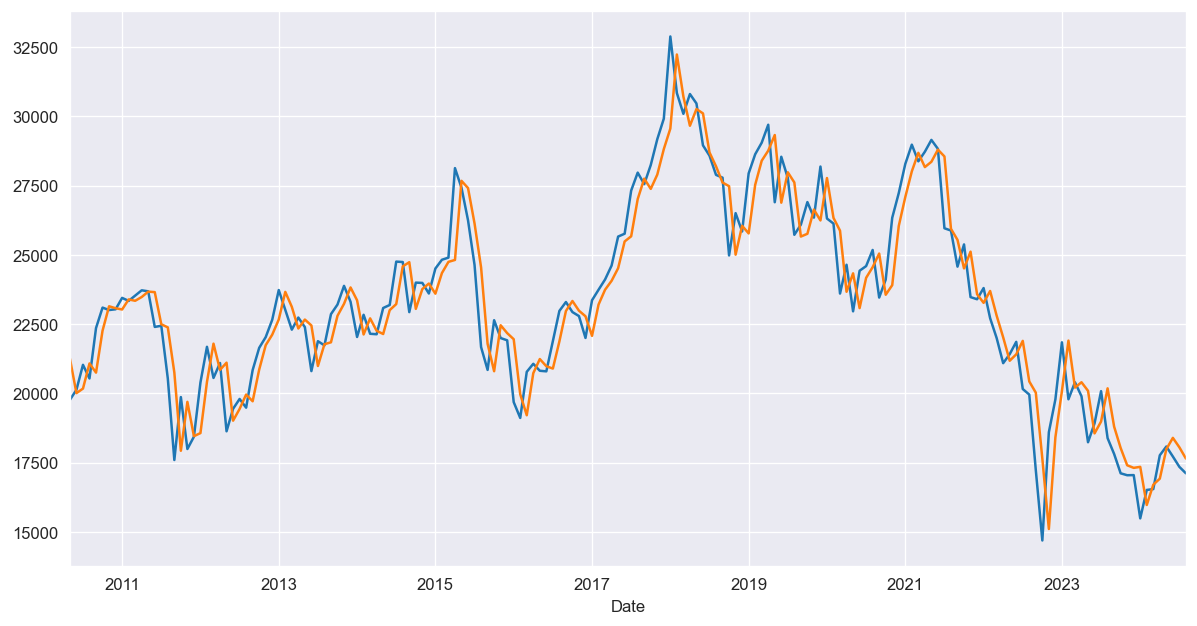

In [80]:
plt.figure(figsize=(12, 6))
data['Close'].plot()
data['forecast'].plot()

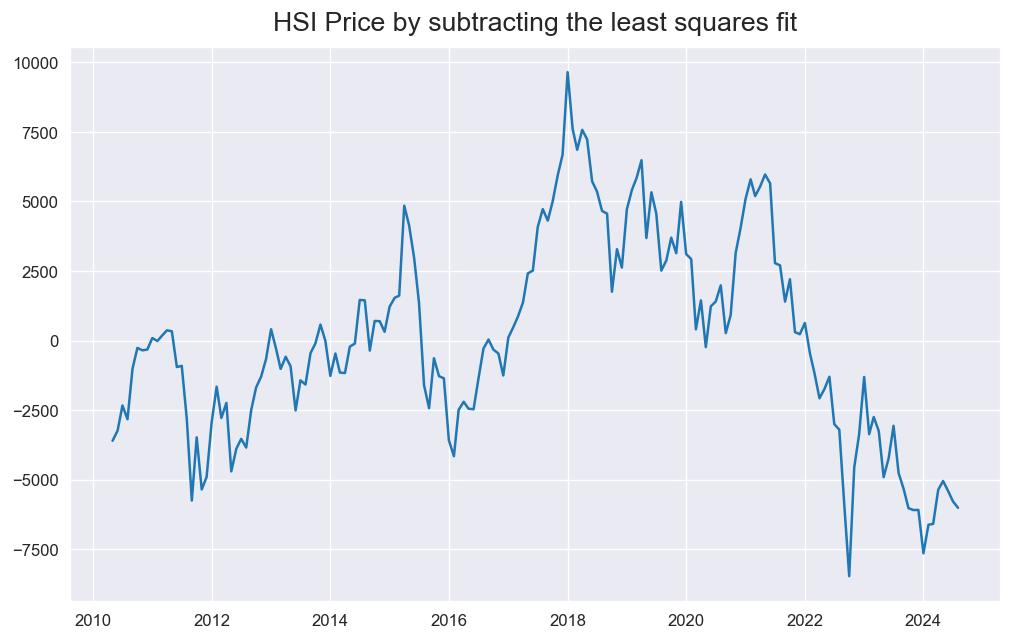

In [81]:
# Using scipy: Subtract the line of best fit
from scipy import signal
de_trended = signal.detrend(data['Close'])
plt.plot(data['Close'].index, de_trended)
plt.title('HSI Price by subtracting the least squares fit', fontsize=16)
plt.show()

Test for seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

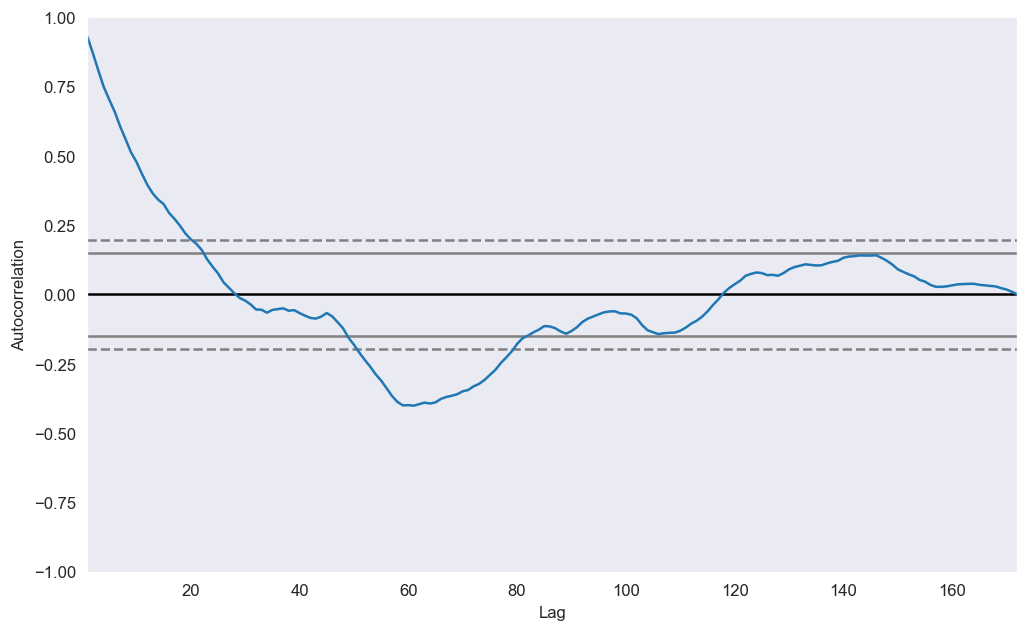

In [82]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(data['Close'])

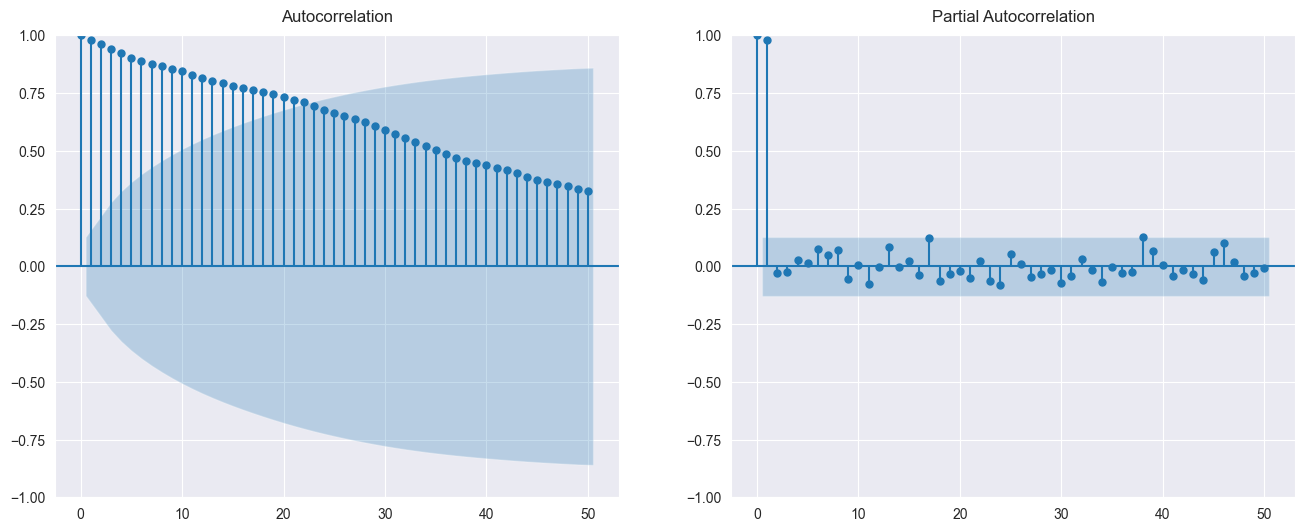

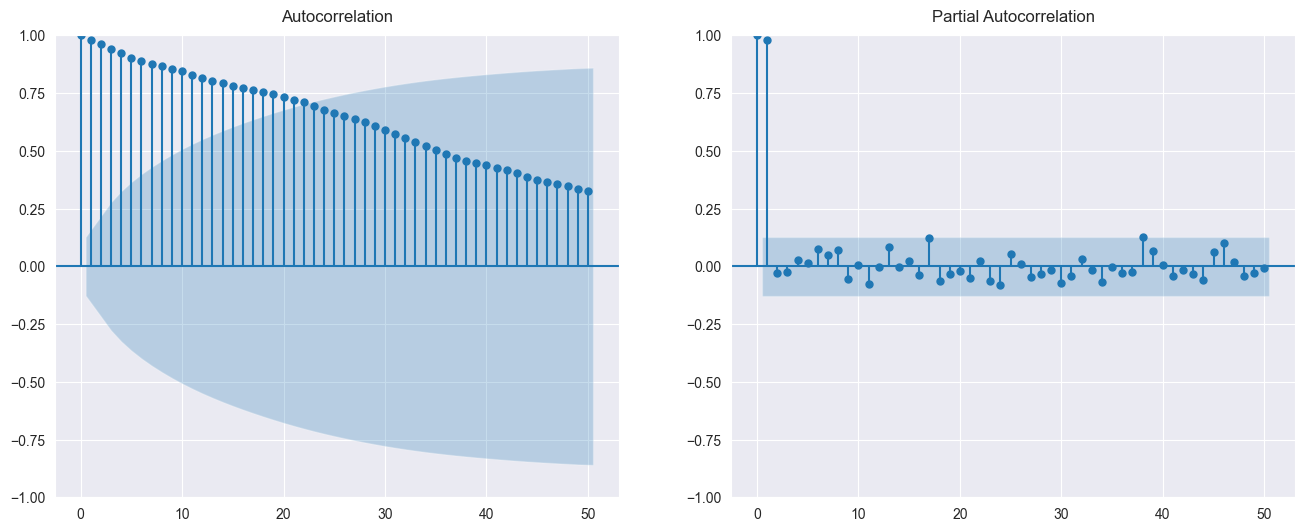

In [66]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,6), dpi= 100)
plot_acf(data['Close'].tolist(), lags=50, ax=axes[0])
plot_pacf(data['Close'].tolist(), lags=50, ax=axes[1])

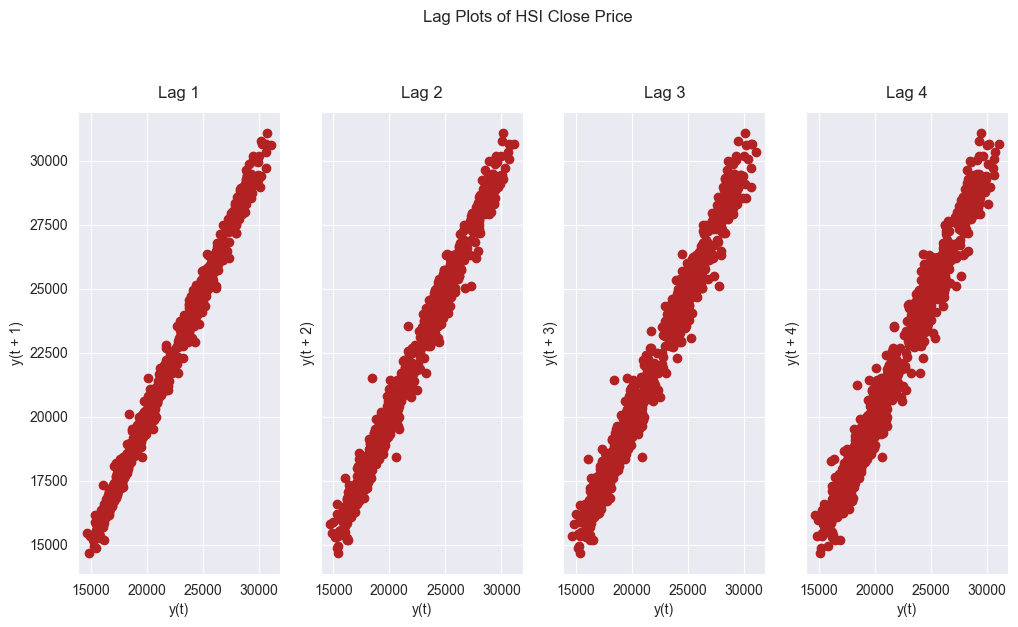

In [59]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(12,6), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data['Close'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of HSI Close Price', y=1.05)    
plt.show()